# Plotting energies of 2d scan performed in MNDO.
# read in data. a is the scan in examine while b is a reference scan done previously.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ndih = 36
npyr = 17
aname = "56tss1scan"
bname = "56tms1scan"
eshift = 3978.   #set arbitrary energy zero point to make plot nicer.
ev2kcalmol = 23.

adih = 0.5*(np.genfromtxt("/home/winter/onsager/tsqm/%s/alldih.dat" %aname)+np.genfromtxt("/home/winter/onsager/tsqm/%s/alternativedih.dat" %aname))
ae1 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE1.dat" %aname, delimiter=' ', skip_header=0, skip_footer=0)
ae2 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE2.dat" %aname, delimiter=' ', skip_header=0, skip_footer=0)
apyr0 = np.genfromtxt("/home/winter/onsager/tsqm/%s/pyramid.dat" %aname, delimiter=' ', skip_header=0, skip_footer=0)
apyr = np.repeat(apyr0,ndih)
bdih = 0.5*(np.genfromtxt("/home/winter/onsager/tsqm/%s/alldih.dat" %bname)+np.genfromtxt("/home/winter/onsager/tsqm/%s/alternativedih.dat" %bname))
be1 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE1.dat" %bname, delimiter=' ', skip_header=0, skip_footer=0)
be2 = np.genfromtxt("/home/winter/onsager/tsqm/%s/allE2.dat" %bname, delimiter=' ', skip_header=0, skip_footer=0)
bpyr0 = np.genfromtxt("/home/winter/onsager/tsqm/%s/pyramid.dat" %bname, delimiter=' ', skip_header=0, skip_footer=0)
bpyr = np.repeat(bpyr0,ndih)

ae1[ ae1==0 ] = np.nan
ae2[ ae2==0 ] = np.nan
be1[ be1==0 ] = np.nan
be2[ be2==0 ] = np.nan
ae1 = ev2kcalmol*(eshift+ae1)
ae2 = ev2kcalmol*(eshift+ae2)
be1 = ev2kcalmol*(eshift+be1)
be2 = ev2kcalmol*(eshift+be2)

# x,y,z1,z2 contain the same data as the .dat loaded above, but rearranging to satisfy matplotlib input requirements
x = np.linspace(-180,0,num=ndih,endpoint=False)
y = np.linspace(-40,40,num=npyr,endpoint=True)
x,y = np.meshgrid(x,y)
az1 = np.reshape(ae1,(npyr,ndih))
az2 = np.reshape(ae2,(npyr,ndih))
bz1 = np.reshape(be1,(npyr,ndih))
bz2 = np.reshape(be2,(npyr,ndih))

z1m = np.fmin(az1, bz1)
z2m = np.fmin(az2, bz2)

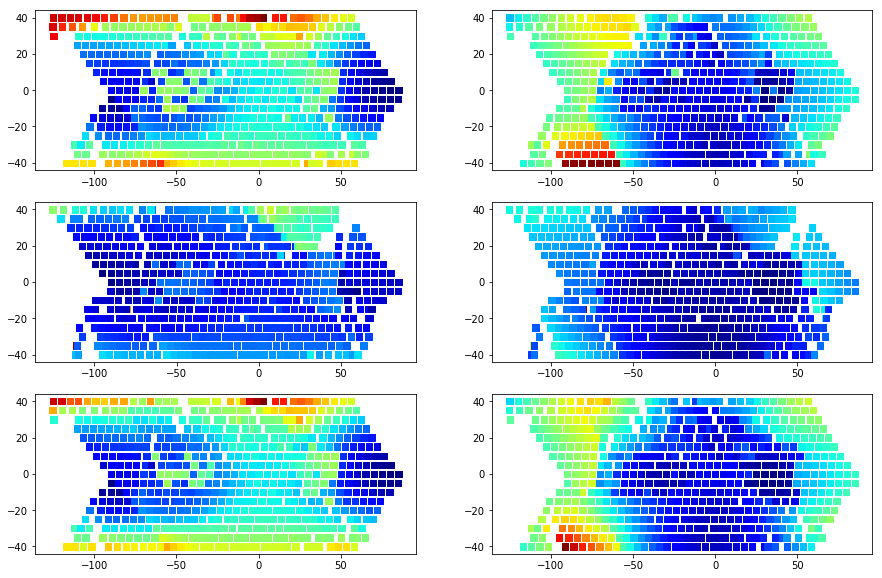

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dotsize=40
style = 'jet'

fig1, ((axa1,axa2),(axb1,axb2),(axm1,axm2)) = plt.subplots(3,2,figsize=(15,10))
axa1.scatter(adih,apyr,c=ae1,marker="s",s=dotsize,cmap=style)
axa2.scatter(adih,apyr,c=ae2,marker="s",s=dotsize,cmap=style)
axb1.scatter(bdih,bpyr,c=be1,marker="s",s=dotsize,cmap=style)
axb2.scatter(bdih,bpyr,c=be2,marker="s",s=dotsize,cmap=style)
axm1.scatter(adih,apyr,c=np.fmin(ae1,be1),marker="s",s=dotsize,cmap=style)
axm2.scatter(adih,apyr,c=np.fmin(ae2,be2),marker="s",s=dotsize,cmap=style)


# Plot pseudocolor map: 
## (in pseudocolor map, if x,y,z have the same dimension, last row and column of z are ignored )

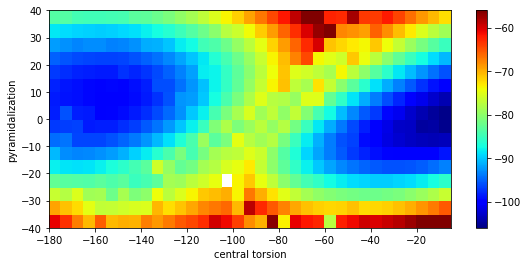

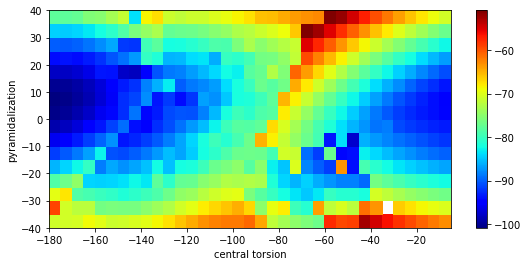

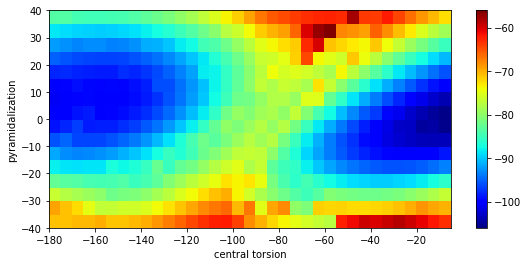

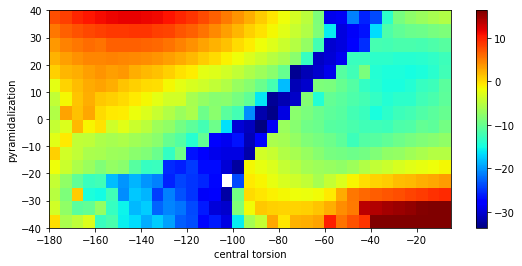

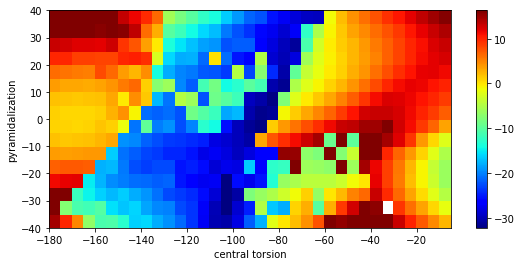

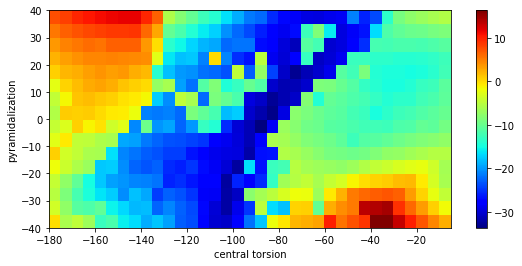

In [3]:
plt.figure(figsize=(9,4))
plt.pcolor(x, y, az1, cmap='jet', vmin=np.nanmin(az1), vmax=np.nanmin(az1)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

plt.figure(figsize=(9,4))
plt.pcolor(x, y, bz1, cmap='jet', vmin=np.nanmin(bz1), vmax=np.nanmin(bz1)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

plt.figure(figsize=(9,4))
plt.pcolor(x, y, z1m, cmap='jet', vmin=np.nanmin(az1), vmax=np.nanmin(az1)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

plt.figure(figsize=(9,4))
plt.pcolor(x, y, az2, cmap='jet', vmin=np.nanmin(az2), vmax=np.nanmin(az2)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

plt.figure(figsize=(9,4))
plt.pcolor(x, y, bz2, cmap='jet', vmin=np.nanmin(bz2), vmax=np.nanmin(az2)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()



plt.figure(figsize=(9,4))
plt.pcolor(x, y, z2m, cmap='jet', vmin=np.nanmin(az2), vmax=np.nanmin(az2)+50)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

# Another plot, contourf, for scan a: 
## (contourf doesn't ignore last column and row of z.)

<Figure size 432x288 with 0 Axes>

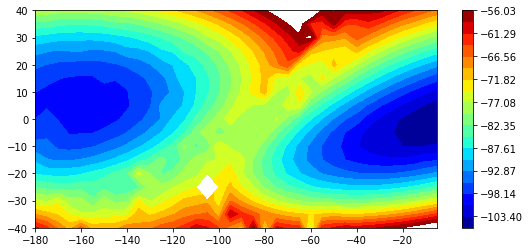

<Figure size 432x288 with 0 Axes>

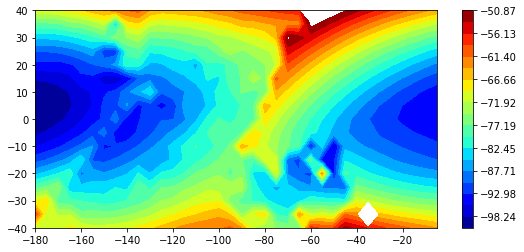

<Figure size 432x288 with 0 Axes>

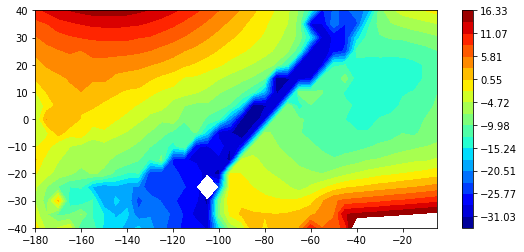

<Figure size 432x288 with 0 Axes>

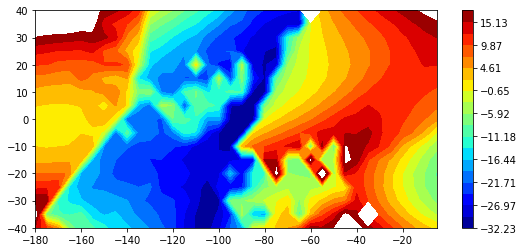

<Figure size 432x288 with 0 Axes>

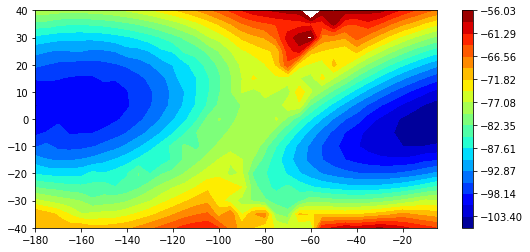

<Figure size 432x288 with 0 Axes>

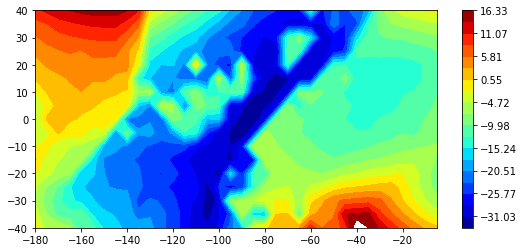

<Figure size 432x288 with 0 Axes>

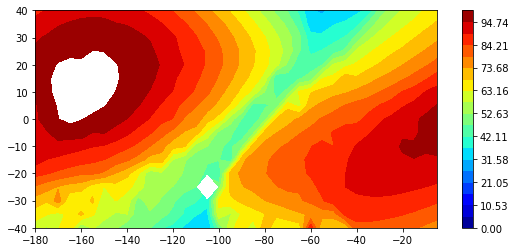

<Figure size 432x288 with 0 Axes>

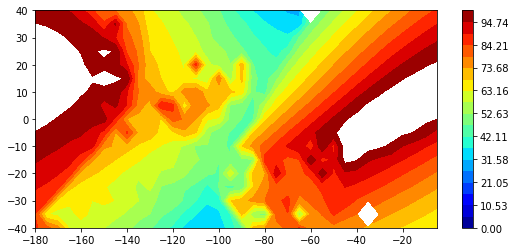

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(9,4))
levels = np.linspace(np.nanmin(az1),np.nanmin(az1)+50,num=20,endpoint=True)
CS = plt.contourf(x, y, az1, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(9,4))
levels = np.linspace(np.nanmin(bz1),np.nanmin(bz1)+50,num=20,endpoint=True)
CS = plt.contourf(x, y, bz1, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(9,4))
levels = np.linspace(np.nanmin(az2),np.nanmin(az2)+50,num=20,endpoint=True)
CS = plt.contourf(x, y, az2, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(9,4))
levels = np.linspace(np.nanmin(bz2),np.nanmin(bz2)+50,num=20,endpoint=True)
CS = plt.contourf(x, y, bz2, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(9,4))
levels = np.linspace(np.nanmin(az1),np.nanmin(az1)+50,num=20,endpoint=True)
CS = plt.contourf(x, y, z1m, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(9,4))
levels = np.linspace(np.nanmin(az2),np.nanmin(az2)+50,num=20,endpoint=True)
CS = plt.contourf(x, y, z2m, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(9,4))
levels = np.linspace(0,100,num=20,endpoint=True)
CS = plt.contourf(x, y, az2-az1, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()

plt.figure(figsize=(9,4))
levels = np.linspace(0,100,num=20,endpoint=True)
CS = plt.contourf(x, y, bz2-bz1, levels, cmap=plt.cm.jet)
plt.colorbar()
plt.figure()


# Showing the regions where a scan gave lower energy, and regions where b lower:

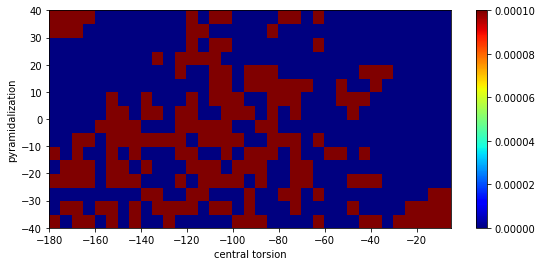

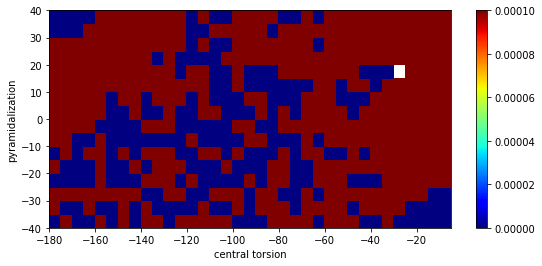

In [211]:
plt.figure(figsize=(9,4))
plt.pcolor(x, y, az1-z1m, cmap='jet', vmin=0, vmax=0.0001)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

plt.figure(figsize=(9,4))
plt.pcolor(x, y, bz1-z1m, cmap='jet', vmin=0, vmax=0.0001)
plt.colorbar()
plt.xlabel('central torsion')
plt.ylabel('pyramidalization')
plt.show()

Though somewhat mosaic, a division from (-70, -40) to (-10, 40) is clearly shown

# Comparing to Pang's plot, which I'm trying to reproduce

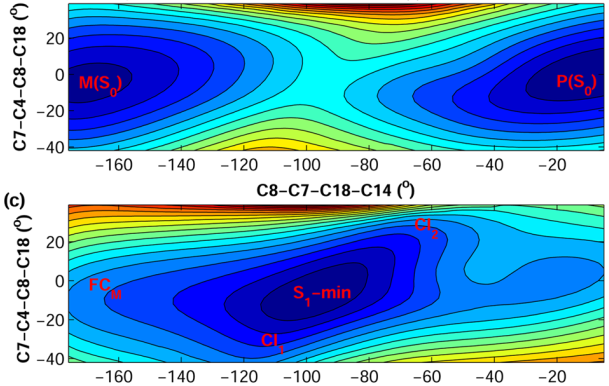

In [42]:
from IPython.display import Image
Image(filename='/home/winter/Desktop/PangPlot.png')